In [8]:
import torch
from torch import sigmoid

In [9]:
a = torch.rand((100,100))
result = torch.sigmoid(a)

In [10]:
1 / (1 + torch.exp(-a)) == result

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

(array([ 886.,  903.,  955.,  918.,  964.,  933., 1065., 1053., 1173.,
        1150.]),
 array([0.5000157, 0.5231187, 0.5462217, 0.5693247, 0.5924277, 0.6155306,
        0.6386336, 0.6617366, 0.6848396, 0.7079426, 0.7310456],
       dtype=float32),
 <BarContainer object of 10 artists>)

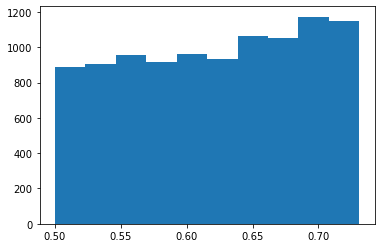

In [11]:
from matplotlib import pyplot as plt
test = 1 / (1 + torch.exp(-a))
plt.hist(test.flatten().numpy())

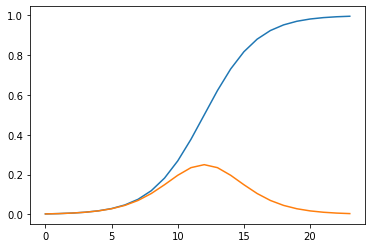

In [12]:
a = torch.arange(-6, 6, 0.5)

from matplotlib import pyplot as plt
test = 1 / (1 + torch.exp(-a))
plt.plot(test.numpy())
plt.plot(test*(1-test))
plt.show()

In [13]:
test*(1-test)

tensor([0.0025, 0.0041, 0.0066, 0.0109, 0.0177, 0.0285, 0.0452, 0.0701, 0.1050,
        0.1491, 0.1966, 0.2350, 0.2500, 0.2350, 0.1966, 0.1491, 0.1050, 0.0701,
        0.0452, 0.0285, 0.0177, 0.0109, 0.0066, 0.0041])

In [14]:
q = torch.rand((2, 10, 3, 3))
sigmoid_q = 1 / (1 + torch.exp(-q))

In [15]:
dim = 2 if len(q.shape) == 4 else 1
print(dim)

rho_hat = torch.mean(sigmoid(q).flatten(dim), dim)
print(rho_hat)
rho_hat = torch.mean(sigmoid_q.flatten(dim), dim)
print(rho_hat)

2
tensor([[0.6292, 0.6262, 0.6258, 0.5843, 0.6578, 0.5885, 0.6011, 0.6086, 0.5952,
         0.6228],
        [0.6544, 0.5728, 0.6383, 0.6120, 0.6333, 0.6484, 0.5966, 0.6253, 0.6313,
         0.6214]])
tensor([[0.6292, 0.6262, 0.6258, 0.5843, 0.6578, 0.5885, 0.6011, 0.6086, 0.5952,
         0.6228],
        [0.6544, 0.5728, 0.6383, 0.6120, 0.6333, 0.6484, 0.5966, 0.6253, 0.6313,
         0.6214]])


In [16]:
rho = torch.ones(rho_hat.shape).to(q.device) * 0.05

In [17]:
torch.sum(rho * torch.log(rho/rho_hat) + (1 - rho) * torch.log((1 - rho)/(1 - rho_hat)), axis=0)

tensor([1.5991, 1.3970, 1.5487, 1.3877, 1.6186, 1.4878, 1.3898, 1.4749, 1.4589,
        1.4993])

In [18]:
def kl_divergence(p: float, q: torch.Tensor, apply_sigmoid=True) -> torch.Tensor:
    '''
        Kullback-Leibler (KL) divergence between a Bernoulli random variable with mean
        p and a Bernoulli random variable with mean q.

        For convolutional output tensor (shape B,C,H,W) the kl divergence is estimated per
        channel.

        Params
        ------
            p: float
                Sparsity parameter, typically a small value close to zero (i.e 0.05).

            q: torch.Tensor
                The output of a layer.

            apply_sigmoid: Bolean
                Indicate if it is necessary to apply sigmoid function to q in order to
                obtain the probability distribution.
        Return
        ------
            kl divergence estimation: torch.Tensor
                In general return a unique value but in convolutional output the tensor
                shape is defined by the number of Channels, i.e shape [1, C].
    '''
    # check if tensor belong to a convolutional output or not
    dim = 2 if len(q.shape) == 4 else 1

    q = sigmoid(q) if apply_sigmoid else q # sigmoid because we need the probability distributions

    rho_hat = torch.mean(q.flatten(dim), dim) 
    rho = torch.ones(rho_hat.shape).to(q.device) * p
    return torch.sum(rho * torch.log(rho/rho_hat) + (1 - rho) * torch.log((1 - rho)/(1 - rho_hat)), axis=0)

In [19]:
q

tensor([[[[0.5204, 0.6894, 0.8462],
          [0.5096, 0.2619, 0.1275],
          [0.9611, 0.5976, 0.3226]],

         [[0.0243, 0.5759, 0.3892],
          [0.7546, 0.7749, 0.2439],
          [0.9142, 0.8179, 0.2426]],

         [[0.4861, 0.0712, 0.7065],
          [0.9046, 0.1701, 0.5668],
          [0.7481, 0.6977, 0.3520]],

         [[0.6384, 0.2647, 0.1952],
          [0.0114, 0.5329, 0.3284],
          [0.1614, 0.9566, 0.0519]],

         [[0.8782, 0.5964, 0.7681],
          [0.8833, 0.5581, 0.6259],
          [0.2795, 0.8141, 0.5258]],

         [[0.8692, 0.3799, 0.3555],
          [0.6389, 0.1301, 0.0397],
          [0.0742, 0.0807, 0.7306]],

         [[0.3997, 0.0327, 0.1973],
          [0.8987, 0.6455, 0.2544],
          [0.6260, 0.6845, 0.0295]],

         [[0.7328, 0.7541, 0.6989],
          [0.2165, 0.9050, 0.0748],
          [0.2298, 0.1059, 0.3448]],

         [[0.3472, 0.7462, 0.2902],
          [0.2571, 0.4359, 0.6533],
          [0.4067, 0.3298, 0.0371]],

         [

In [20]:
1 + (1e-3*kl_divergence(0.05, q))

tensor([1.0016, 1.0014, 1.0015, 1.0014, 1.0016, 1.0015, 1.0014, 1.0015, 1.0015,
        1.0015])

In [29]:
# 1 - torch.exp(-kl_divergence(0.05, q))

1e-3*(torch.exp(-(kl_divergence(0.05, q))))

tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])

In [30]:
a = q.clone()
a[:] = 0.05
# print(1e-3*kl_divergence(0.05, a))
1e-3*(torch.exp(-(kl_divergence(0.05, a))))

tensor([0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004,
        0.0004])

In [32]:
print(1e-3*kl_divergence(0.05, q))
print(1e-3*kl_divergence(0.05, a))

tensor([0.0016, 0.0014, 0.0015, 0.0014, 0.0016, 0.0015, 0.0014, 0.0015, 0.0015,
        0.0015])
tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010,
        0.0010])


In [91]:
kl_divergence(0.05, sigmoid_q, apply_sigmoid=False)

tensor([1.5125, 1.4412, 1.4672, 1.5082, 1.5662, 1.3976, 1.3505, 1.4790, 1.6120,
        1.5231])

In [97]:
B,_,H,W = sigmoid_q.shape
kl_loss = kl_divergence(0.05, sigmoid_q, apply_sigmoid=False)[None,:,None,None]

In [101]:
print(B, H, W)
print(kl_loss.expand(B, -1, H, W).shape)

2 3 3
torch.Size([2, 10, 3, 3])


# Sparse Sig Test

In [1]:
import os, sys
project_dir = os.path.join(os.getcwd(),'..')
if project_dir not in sys.path:
    sys.path.append(project_dir)
    
from Sparse import SparseSigmoid, ReLUWithSparsity
import torch

In [2]:
dtype = torch.float
device = torch.device("cpu")

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

In [3]:
# Create random Tensors for weights.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

act = SparseSigmoid(beta=1e-2)
# act = ReLUWithSparsity(beta=1e-2)
# act = torch.nn.Sigmoid()

learning_rate = 1e-6
for t in range(10000):
    # To apply our Function, we use Function.apply method. We alias this as 'relu'.
    # act = sparse_relu.apply
    # relu = original_relu

    # Forward pass: compute predicted y using operations; we compute
    # ReLU using our custom autograd operation.
    y_pred = act(x.mm(w1)).mm(w2)
    # y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

99 27120.078125
199 20161.357421875
299 16600.876953125
399 14549.0322265625
499 13256.4912109375
599 12372.5712890625
699 11686.6474609375
799 11119.1474609375
899 10669.1640625
999 10270.3955078125
1099 9927.93359375
1199 9634.8251953125
1299 9362.544921875
1399 9105.9580078125
1499 8868.7939453125
1599 8651.3271484375
1699 8451.037109375
1799 8255.2998046875
1899 8061.013671875
1999 7878.02001953125
2099 7701.82373046875
2199 7531.3564453125
2299 7369.2666015625
2399 7218.0693359375
2499 7076.5126953125
2599 6941.51416015625
2699 6809.25244140625
2799 6678.89990234375
2899 6551.318359375
2999 6424.99267578125
3099 6302.63720703125
3199 6188.8779296875
3299 6084.0107421875
3399 5986.0908203125
3499 5893.10498046875
3599 5803.7294921875
3699 5717.37158203125
3799 5633.7783203125
3899 5552.5400390625
3999 5473.02490234375
4099 5394.7119140625
4199 5317.365234375
4299 5240.8818359375
4399 5165.423828125
4499 5091.6865234375
4599 5020.35400390625
4699 4951.43359375
4799 4884.3935546875
4

In [4]:
lz = (x.mm(w1)<=0)[0].sum()
bz = (x.mm(w1)>0)[0].sum()
print('Number of values closes to 0: {}; bigger: {}'.format(lz, bz))

Number of values closes to 0: 54; bigger: 46


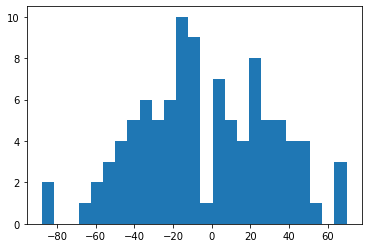

In [5]:
from matplotlib import pyplot as plt

a = x.mm(w1)[0].cpu()
plt.hist(a.detach().cpu().numpy(), bins=25)
plt.show()

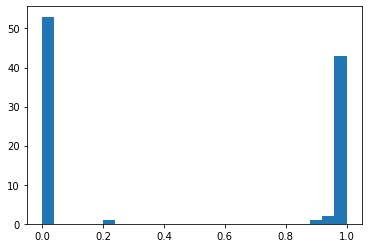

In [6]:
from matplotlib import pyplot as plt
from torch import sigmoid, relu

a = sigmoid(x.mm(w1)[0].cpu())
# a = relu(x.mm(w1)[0].cpu()) 
plt.hist(a.detach().cpu().numpy(), bins=25)
plt.show()